### **Fundamentals of AI Project B Part A** (**By** Vamsi Krishna A)

The answers for each requirement **R3, R4, R5 and R**6 are mentioned below the code

***Shareable URL :*** https://colab.research.google.com/drive/1qs9sMKEbZT-7vA74mSbedKngX7MDK79Y?usp=sharing


In [ ]:
import matplotlib.pyplot as plt
import random
import math
import numpy

In [ ]:
import matplotlib.pyplot as plt

def plot_schedule(machine_data, machine_num, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.title(f"Job Schedule")
    plt.xlabel("Time")
    plt.ylabel("Job")
    color_names = [
        'red', 'green', 'blue', 'yellow', 'orange', 'purple',
        'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender',
        'brown', 'beige', 'maroon', 'mint', 'coral', 'navy',
        'olive', 'grey', 'black', 'white'
    ]
    for job_data in machine_data:
        job_name, start_time, end_time, m = job_data
        plt.plot([start_time, end_time], [job_name, job_name], linewidth=2, label=job_name, color=color_names[m])
        plt.scatter(start_time, job_name, color='green', marker='|', s=100, label='Start')
        plt.scatter(end_time, job_name, color='red', marker='|', s=100, label='End')

    # plt.legend()
    plt.yticks(range(len(machine_data)), [job_data[0] for job_data in machine_data])
    plt.xticks(range(end_time + 1))
    plt.grid(True)
    plt.show()

### Code to allocate operations to machines based on the given schedule sequence (Implementation of **R1**)

In [ ]:
def get_start_time(prev_job_end_time, machine):
  if(machine):
    if(machine[-1][-1] >= prev_job_end_time):
      return machine[-1][-1]
    else:
      return machine[-1][-1] + abs(machine[-1][-1] - prev_job_end_time)
  return prev_job_end_time

def allocate_ops_to_machines(job_schedule, J, M):
    machines = [[] for i in range(M)]
    # print(machines)
    opt_sched = []
    o_c = 0
    for ji, j in enumerate(job_schedule, start = 1):
        o_s, prev_job_end_time = 0, 0
        j = j - 1
        for oi, o in enumerate(J[j], start = 1):
            machine = machines[(o_c - 1) % M]
            s_t = get_start_time(prev_job_end_time, machine)
            machine.append([f"J_{j}_O_{oi}", s_t, s_t + o])
            prev_job_end_time = s_t + o
            o_c += 1
            # print([f"J_{j+1}_O_{oi}", s_t, s_t + o])
            opt_sched.append([f"J_{j+1}_O_{oi}", s_t, s_t + o, (o_c - 1) % M])
    # print(machines)

    return opt_sched

### Method to create **N Jobs** with **M operations** each with job time in the given **duration_range**

In [ ]:
def create_n_jobs(N, M, duration_range):
  '''
    N - Number of Jobs
    M - Number of operations in each Job
    duration_range - [start, end], the range in which the random operation times are generated
  '''
  return [[random.choice(range(duration_range[0], duration_range[1] + 1)) for j in range(M)] for i in range(N)]

### Code to generate the successor by swapping two random jobs

In [ ]:
def successor(job_sched, N):
  '''
    This method takes two random points in the schedule and swaps their order

    job_schedule : list of jobs that are scheduled
    N : Total number of Jobs
  '''
  n1, n2 = random.sample(range(N), 2)
  job_sched[n1], job_sched[n2] = job_sched[n2], job_sched[n1]
  return job_sched

### Code to compute and return the makespan value (Implementation of R2)

In [ ]:
def comp_makespan(operations_schedule):
  '''
    This method returns the maximum make span value
  '''
  make_span = 0
  for operation in operations_schedule:
    make_span = max(make_span, operation[-2])
  return make_span

In [ ]:
def simulated_annealing(J, jobs, N, initial_schedule = None):

  T = 1000
  current_job_schedule = numpy.random.permutation(J) + 1 if initial_schedule == None else initial_schedule
  current_opt_schedule = allocate_ops_to_machines(current_job_schedule, jobs, N)
  initial_makespan = comp_makespan(allocate_ops_to_machines(current_job_schedule, jobs, N))
  print(f"Initial Schedule : {current_job_schedule}, make span = {initial_makespan}")
  i = 0
  while(i < 400):
    next_job_schedule = successor(current_job_schedule, J)
    next_opt_schedule = allocate_ops_to_machines(next_job_schedule, jobs, N)
    ΔE = comp_makespan(next_opt_schedule) - comp_makespan(current_opt_schedule)
    if(ΔE < 0):
      current_job_schedule = next_job_schedule
      current_opt_schedule = next_opt_schedule
    else:
      r=random.random()
      e_ΔE_by_T = math.exp(ΔE / T)
      if(e_ΔE_by_T < r):
        current_job_schedule = next_job_schedule
        current_opt_schedule = next_opt_schedule
    # print(current_job_schedule)
    i += 1
    T *= 0.99
  return comp_makespan(current_opt_schedule), initial_makespan

In [ ]:
jobs = [[3, 6], [10, 1], [3, 2], [2, 4], [8, 8]]
J = [4, 1, 5, 3, 2]
M = 2

schedule = allocate_ops_to_machines(J, jobs.copy(), M)

print(schedule)
print(comp_makespan(schedule))

[['J_4_O_1', 0, 2, 0], ['J_4_O_2', 2, 6, 1], ['J_1_O_1', 2, 5, 0], ['J_1_O_2', 6, 12, 1], ['J_5_O_1', 5, 13, 0], ['J_5_O_2', 13, 21, 1], ['J_3_O_1', 13, 16, 0], ['J_3_O_2', 21, 23, 1], ['J_2_O_1', 16, 26, 0], ['J_2_O_2', 26, 27, 1]]
27


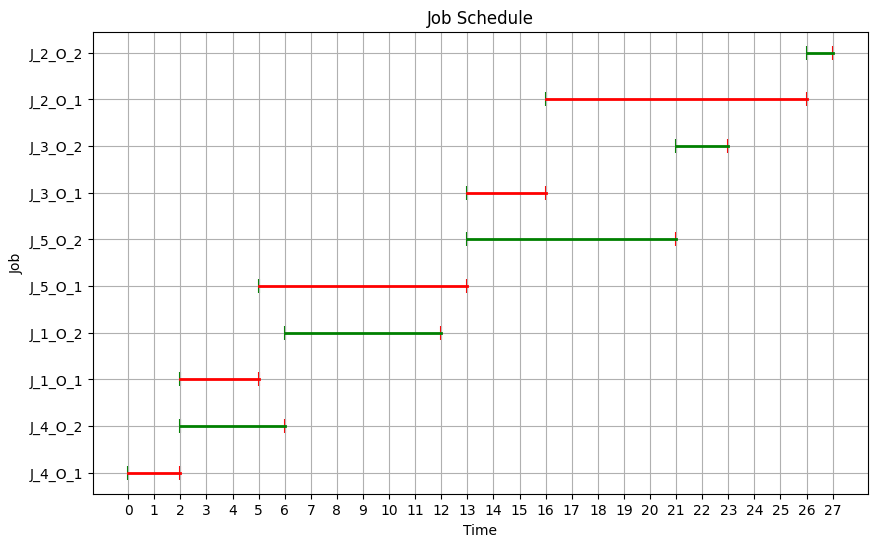

In [ ]:
plot_schedule(schedule, 1)





*   **R3 -** Jobs used in Table1 of Tutorial 3 were used to generate the Makespan using Simulated Annealing





# R3

*   Simulated Annealing algorithm with **Random** initial schedule and the final **makespan**

In [ ]:
R3_random, initial_makespan = simulated_annealing(5, jobs, 2)
print(f"The final makespan value is : {R3_random}")
print(f"The Difference between the initial and final makspan : {abs(R3_random - initial_makespan)}")

Initial Schedule : [5 1 3 2 4], make span = 30
The final makespan value is : 27
The Difference between the initial and final makspan : 3




*   Simulated Annealing with the initial schedule as **[4, 1, 5, 3, 2]** and the final makespan



In [ ]:
R3_initial, initial_makespan = simulated_annealing(5, jobs, 2, [4, 1, 5, 3, 2])
print(f"The final makespan value is : {R3_initial}")
print(f"The Difference between the initial and final makspan : {abs(R3_initial - initial_makespan)}")

Initial Schedule : [4, 1, 5, 3, 2], make span = 27
The final makespan value is : 27
The Difference between the initial and final makspan : 0


# R4

* The **makespan value** returned by the Simulated Annealing algorithm is **lesser than** the **makespan of the initial** schedule.
* ***i.e.;*** The ***optimal makespan*** when compared to ***initial makespan*** is being returned by the **SA**

In [ ]:
R4_jobs = create_n_jobs(50, 3, [5, 50])
R4_M = 5
R4_makespan, initial_makespan = simulated_annealing(50, R4_jobs, R4_M)
print(f"The final makespan value is : {R4_makespan}")
print(f"The Difference between the initial and final makspan : {abs(R4_makespan - initial_makespan)}")

Initial Schedule : [ 4  3 48 13 45  6 32 25 33 44 21 10 47 24 34 31 23  7  9 35 46 11 14 17
 27 37  2 41 20 38 29 15 50 40 19 43  5 42 22 16 28 30  8  1 12 39 36 49
 18 26], make span = 1638
The final makespan value is : 1526
The Difference between the initial and final makspan : 112


# R5

* The **makespan value** returned by the Simulated Annealing algorithm is **lesser than** the **makespan of the initial** schedule.
* ***i.e.;*** The ***optimal makespan*** when compared to ***initial makespan*** is being returned by the **SA**

In [ ]:
R5_jobs = create_n_jobs(50, 5, [5, 50])
R5_M = 3
R5_makespan, initial_makespan = simulated_annealing(50, R5_jobs, R5_M)
print(f"The final makespan value is : {R5_makespan}")
print(f"The Difference between the initial and final makspan : {abs(R5_makespan - initial_makespan)}")

Initial Schedule : [ 4  1 46 12 27 37 13 21 18 48 39 26 22 42 29 24 19 20  2 36 25  7 47 50
 30  8 16 15 45  6 35 34  5 38 31 33 44 11 10 14 40  3 28 49 23 32  9 17
 41 43], make span = 4635
The final makespan value is : 4552
The Difference between the initial and final makspan : 83


# R6

### Assumptions

* The condition **"ΔE > 0"** as per the Tutorial 3 is been changed to the **"ΔE < 0"** where if the neighbours makespan is less than the current makespan then the neighbour should be accepted.

### Description

* Using the simulated algorithm the optimal makespan value is computed and returned. As per the observations from the above requirements and their generated solutions, we can make sure that the final makespan value is less than the the initial makespan value.
* The performance of this algorithm can be improved by selecting the best initial schedule. Here, the code is configured in such a way to generate the random schedule and the same is being used to expand further.